In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
# Week 10, Day 3, Activity 10 - Flask_with_ORM
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)

# Establish connection
conn = engine.connect()

In [3]:
# Week 10, Day 3, Activity 10 - Flask_with_ORM
inspector = inspect(engine)

tables = inspector.get_table_names()

tables

['measurement', 'station']

In [4]:
# Week 10, Day 2, Activity 7 - Exploration
# Using the for loop to loop through all the tables.

for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [5]:
# Review the top 10 rows

query = """
        SELECT
            *
        FROM
            station
        LIMIT 10;
    """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
# Review the top 10 rows

query = """
        SELECT
            *
        FROM
            measurement
        LIMIT 10;
    """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.

query1 = """
        SELECT
          max(date)
        FROM
            measurement
        """

engine.execute(query1).fetchall()

[('2017-08-23',)]

In [8]:
query2 = """
        SELECT
          *
        FROM
            measurement
        where
            date >= '2016-08-23'
        order by
            date;
        """

engine.execute(query2).fetchall()

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (5091, 'USC00513117', '2016-08-23', 0.15, 76.0),
 (7331, 'USC00514830', '2016-08-23', 0.05, 80.0),
 (8825, 'USC00517948', '2016-08-23', None, 80.0),
 (11851, 'USC00519523', '2016-08-23', 0.02, 80.0),
 (14608, 'USC00519281', '2016-08-23', 1.79, 77.0),
 (19202, 'USC00516128', '2016-08-23', 0.7, 74.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (5092, 'USC00513117', '2016-08-24', 2.15, 76.0),
 (7332, 'USC00514830', '2016-08-24', 2.28, 80.0),
 (8826, 'USC00517948', '2016-08-24', None, 78.0),
 (11852, 'USC00519523', '2016-08-24', 1.22, 79.0),
 (14609, 'USC00519281', '2016-08-24', 2.15, 77.0),
 (19203, 'USC00516128', '2016-08-24', 1.45, 74.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (5093, 'USC00513117', '2016-08-25', 0.08, 77.0),
 (7333, 'USC00514830', '2016-08-25', 0.0, 81.0),
 (8827, 'USC00517948', '2016-08-25', 0.0, 81.0),
 (11853, 'USC00519523', '2016-08-25', 0.21, 80.0),
 (14610, 'USC00519281', '2016-08-25', 0.06, 80.

In [9]:
# Create dataframe, "precipitation_df"
precipitation_df = pd.read_sql(query2, conn)
precipitation_df.head()

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,5091,USC00513117,2016-08-23,0.15,76.0
2,7331,USC00514830,2016-08-23,0.05,80.0
3,8825,USC00517948,2016-08-23,NaN,80.0
4,11851,USC00519523,2016-08-23,0.02,80.0


In [10]:
# Check the dataframe
precipitation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2230 non-null   int64  
 1   station  2230 non-null   object 
 2   date     2230 non-null   object 
 3   prcp     2021 non-null   float64
 4   tobs     2230 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 87.2+ KB


In [11]:
# Convert "date" column to "datetime" Dataframe
precipitation_df["date"] = pd.to_datetime(precipitation_df["date"])
precipitation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       2230 non-null   int64         
 1   station  2230 non-null   object        
 2   date     2230 non-null   datetime64[ns]
 3   prcp     2021 non-null   float64       
 4   tobs     2230 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 87.2+ KB


In [12]:
# Create Dataframe with only "date" and "prcp"

precipitation_df.columns

Index(['id', 'station', 'date', 'prcp', 'tobs'], dtype='object')

In [13]:
# Create Dataframe with only "date" and "prcp"

prcp_df = pd.DataFrame()

prcp_df["date"] = precipitation_df.date
prcp_df["prcp"] = precipitation_df.prcp

prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [14]:
# Check the "prcp_df" dataframe

prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


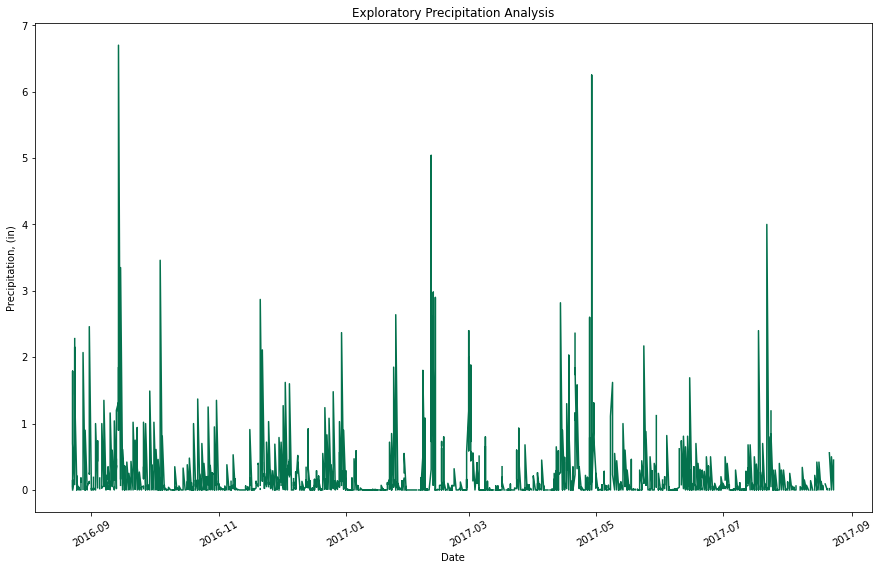

In [15]:
# Create plot

plt.figure(figsize=(15,9))

plt.plot(prcp_df["date"], prcp_df["prcp"], color="#04724D")

plt.title("Exploratory Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation, (in)")
plt.xticks(rotation=30)

plt.savefig("Resources/Precipitation Plot.png")
plt.show()

In [16]:
# Booth office hours
query3 = """
        SELECT
            date,
            avg(prcp) as prcp
        FROM
            measurement
        where
            date >= '2016-08-23'
        group by
            date
        order by
            date;
        """

engine.execute(query3).fetchall()

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [17]:
# Booth office hours, Create grouped-by df to check the avg precipitation. 
prcp2_df = pd.read_sql(query3, conn)
prcp2_df["date"] = pd.to_datetime(prcp2_df["date"])
prcp2_df.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


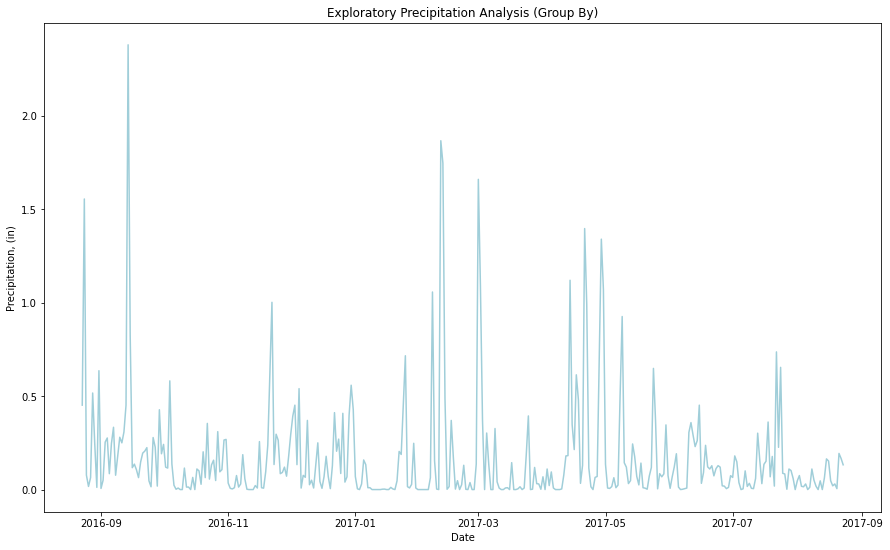

In [18]:
# Create plot

plt.figure(figsize=(15,9))
plt.plot(prcp2_df["date"], prcp2_df["prcp"], color="#A0CED9")

plt.title("Exploratory Precipitation Analysis (Group By)")
plt.xlabel("Date")
plt.ylabel("Precipitation, (in)")

plt.savefig("Resources/Precipitation Plot (Group By).png")
plt.show()

#  Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset.
query4 = """
        SELECT
            count(station)
        FROM
            station;
    """
engine.execute(query4).fetchall()

[(9,)]

In [20]:
# Design a query to find the most active stations 
query5 = """
        SELECT
            s.station,
            s.name,
            count(m.id) as observations
        FROM
            measurement m
            JOIN station s on m.station = s.station
        GROUP BY
            s.station,
            s.name
        ORDER BY
            observations desc;
        """

# List the stations and the counts in descending order.

pd.read_sql(query5, conn)

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [21]:
# What stations have the most rows?
pd.read_sql(query5, conn).max()

station                                USC00519523
name            WAIMANALO EXPERIMENTAL FARM, HI US
observations                                  2772
dtype: object

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

query6 = """
        SELECT
            station,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            measurement
        WHERE
            station = 'USC00519281';
        """

pd.read_sql(query6, conn)

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram.

query7 = """
        SELECT
        station,
          date,
          tobs
        FROM
            measurement
        where
            date >= '2016-08-23'
        and station = 'USC00519281'
        order by
            date asc
        """

# Create a Dataframe
station_df = pd.read_sql(query7, conn)
station_df["date"] = pd.to_datetime(station_df["date"])
station_df.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


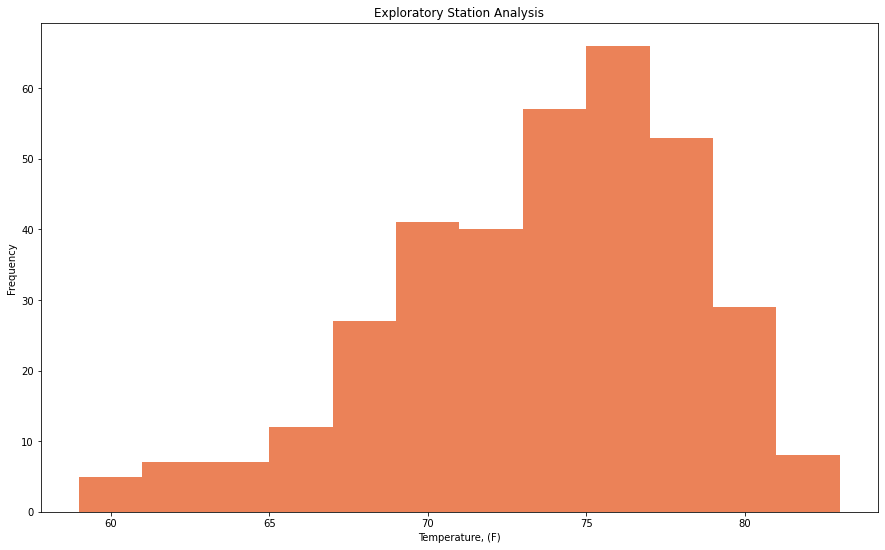

In [24]:
# Code to create histogram of the temperature observation at each station 
plt.figure(figsize=(15,9))

plt.hist(station_df.tobs, bins=12, color = "#EB8258")

plt.title("Exploratory Station Analysis")
plt.xlabel("Temperature, (F)")
plt.ylabel("Frequency")

plt.savefig("Resources/Station Histogram.png")

plt.show()

In [25]:
# Close Session
conn.close()